### Assignment
In this assignment, you'll continue working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

* postgres_user = 'dsbc_student'
* postgres_pw = '7*.8G9QH21'
* postgres_host = '142.93.121.174'
* postgres_port = '5432'
* postgres_db = 'studentsperformance'

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
* Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
* Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [18]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize


from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox


warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


###  Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

- how do we know if they are normally distributed? is this by jarque test?
- 

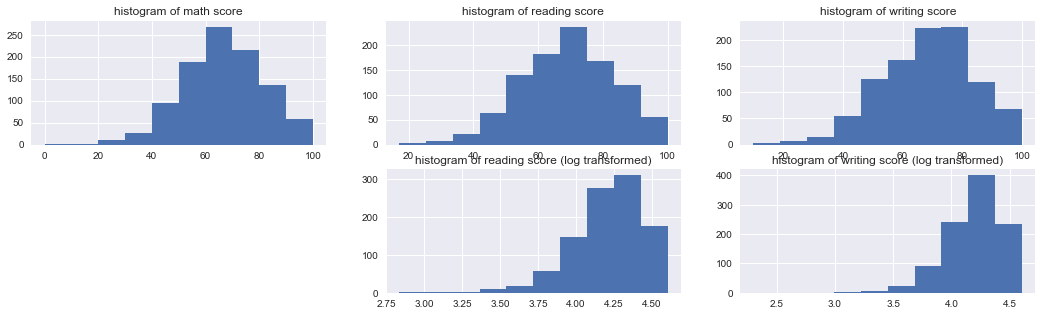

In [14]:
plt.figure(figsize=(18,5))

# histograms of the original data
plt.subplot(2, 3, 1)
plt.hist(df["math score"])
plt.title("histogram of math score")

plt.subplot(2, 3, 2)
plt.hist(df["reading score"])
plt.title("histogram of reading score")

plt.subplot(2, 3, 3)
plt.hist(df["writing score"])
plt.title("histogram of writing score")


### Seems like the math score has a zero

# histograms of the log transformed data
#plt.subplot(2, 3, 4)
#plt.hist(np.log(df["math score"]))
#plt.title("histogram of math score (log transformed)")

plt.subplot(2, 3, 5)
plt.hist(np.log(df["reading score"]))
plt.title("histogram of reading score (log transformed)")

plt.subplot(2, 3, 6)
plt.hist(np.log(df["writing score"]))
plt.title("histogram of writing score (log transformed)")

plt.show()

In [33]:
### Checking to see if the data is normalized with jarque_bera

jb_stats = jarque_bera(df["math score"])
norm_stats = normaltest(df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))



jb_stats = jarque_bera(df["reading score"])
norm_stats = normaltest(df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(df["writing score"])
norm_stats = normaltest(df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


In [ ]:
### Questions: why are math scores NAN
### why re the p-values so small? 

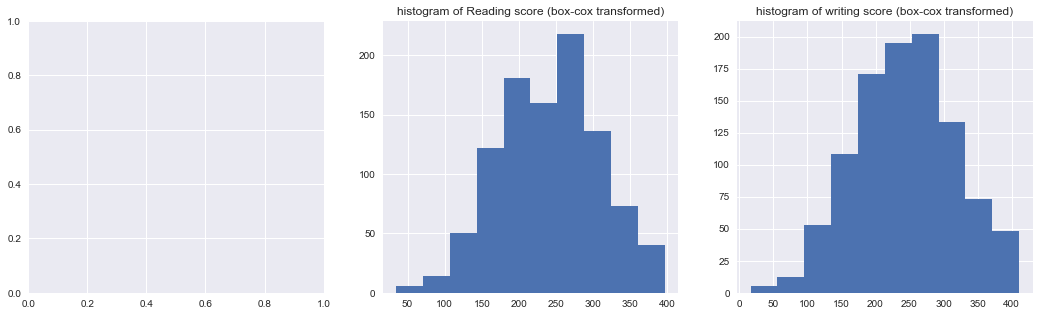

In [34]:
### convert the distribution to normal using box cox


# video_uploads_boxcox,_  - what's the 2nd _ for

#math_score_boxcox,_ = boxcox(df["math score"]) # this did not work because there is 0 in the data
reading_score_boxcox,_ = boxcox(df["reading score"])
writing_score_boxcox,_ = boxcox(df["writing score"])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
#plt.hist(subscribers_boxcox)
#plt.title("histogram of subscribers (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(reading_score_boxcox)
plt.title("histogram of Reading score (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(writing_score_boxcox)
plt.title("histogram of writing score (box-cox transformed)")

plt.show()


### #math_score_boxcox,_ = boxcox(df["math score"]) # this did not work because there must be 0 or negetive data in the math score

In [22]:
df["math score"].value_counts() # looks like there is a 0 in here so that

65    36
62    35
59    32
69    32
73    27
61    27
67    26
63    26
68    26
71    26
58    25
74    25
77    24
53    24
66    24
81    22
79    22
75    21
76    21
64    20
82    18
70    18
54    18
55    18
57    18
52    18
72    18
49    17
80    17
60    16
      ..
97     6
42     6
41     6
89     6
35     5
43     5
37     4
93     4
39     4
29     3
32     3
99     3
38     3
98     3
96     3
30     2
36     2
95     2
27     2
34     2
33     1
28     1
26     1
24     1
23     1
22     1
19     1
18     1
8      1
0      1
Name: math score, dtype: int64

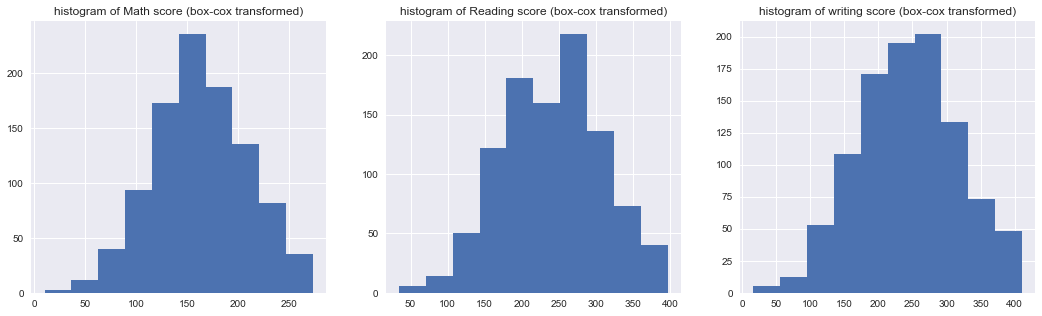

In [35]:
### convert the distribution to normal using box cox


# video_uploads_boxcox,_  - what's the 2nd _ for

math_score_boxcox,_ = boxcox(df[df["math score"] > 0]["math score"])
reading_score_boxcox,_ = boxcox(df["reading score"])
writing_score_boxcox,_ = boxcox(df["writing score"])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(math_score_boxcox)
plt.title("histogram of Math score (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(reading_score_boxcox)
plt.title("histogram of Reading score (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(writing_score_boxcox)
plt.title("histogram of writing score (box-cox transformed)")

plt.show()

In [36]:
# lets run the normality test again and see what it says on the box-cox data

jb_stats = jarque_bera(math_score_boxcox)
norm_stats = normaltest(math_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))



jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.720098104874378 and p value is 0.4231413256953708
Normality test statistics is 1.8323073377495822 and p value is 0.40005482895717037
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467


### What does this test tell us?
- pvalue > 0.05 therefore the distribution is normal for all the varlables

### Say we want to use a single variable for the exam scores as our target. 
* For this purpose, create a new variable by taking a weighted average of the exam scores. 
* Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.


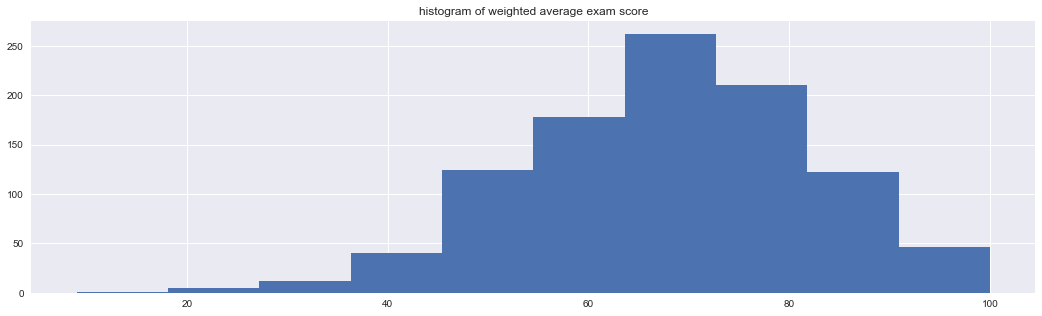

In [37]:
# create a new variable by taking a weighted average of the exam scores.
exam_score = (df["math score"] + df["reading score"] + df["writing score"])/3

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
#plt.subplot(1, 3, 1)
plt.hist(exam_score)
plt.title("histogram of weighted average exam score")
plt.show()

In [38]:
# check to see if it is normally distributed by jarque_bera test
# if Jarque-Bera pvalue > 0.05 accept HO (normally distributed)
# if Jarque-Bera pvalue < 0.05 Reject HO (Not normally distributed)

jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


#### The pValues here are very low therefore, reject HO which means distribution is not normal 

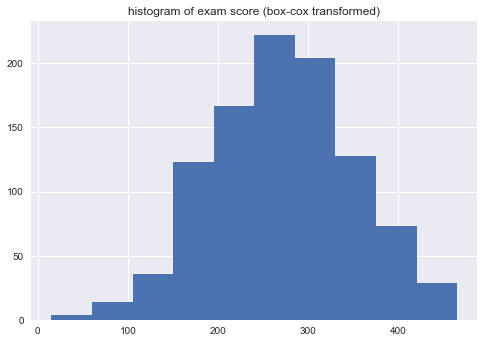

In [60]:
# Apply a Box-Cox transformation and check whether or not the transformed variable 
# is normally distributed.

exam_score_boxcox,_ = boxcox(exam_score)


# histograms of the box-cox transformed data

plt.hist(exam_score_boxcox)
plt.title("histogram of exam score (box-cox transformed)")


plt.show()

In [41]:
# Test to see if the distribution is normal
jb_stats = jarque_bera(exam_score_boxcox)
norm_stats = normaltest(exam_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 2.4353987431906026 and p value is 0.29591016374203183
Normality test statistics is 2.779857245981238 and p value is 0.24909308351651774


#### pvalue > 0.05 === normal distribution

### Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

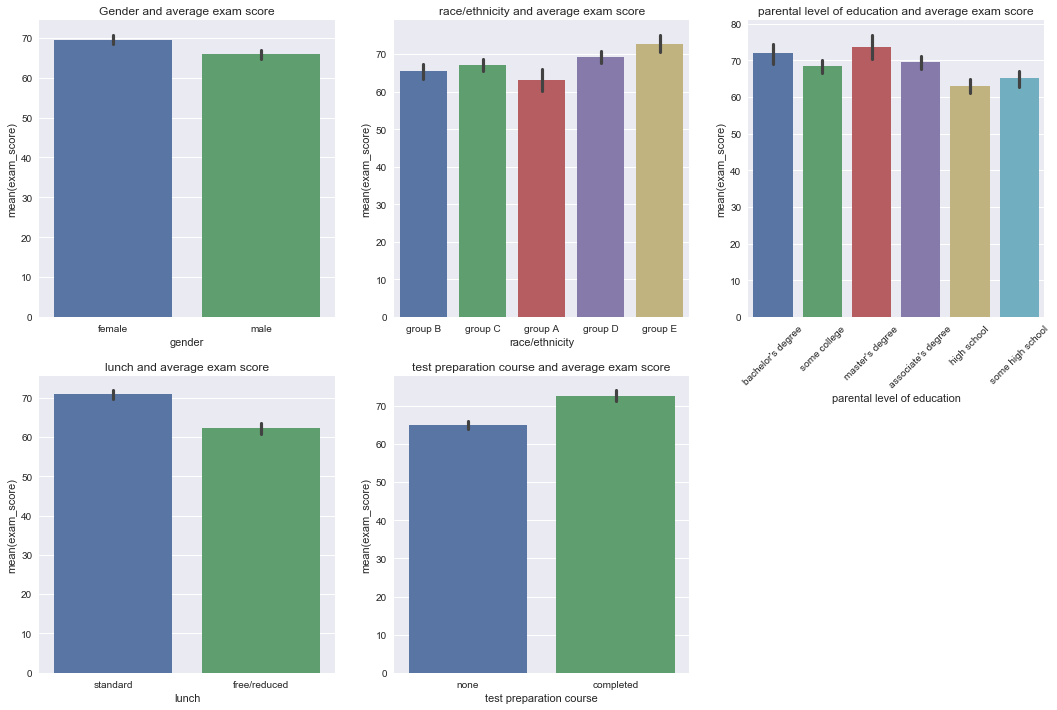

In [67]:
df['exam_score'] = exam_score

#### Gender vs average exam score

plt.figure(figsize=(18,12))

plt.subplot(2,3,1)
sns.barplot(df['gender'],df['exam_score'])
plt.title('Gender and average exam score')

#### Race vs average exam score

plt.subplot(2,3,2)
sns.barplot(df['race/ethnicity'],df['exam_score'])
plt.title('race/ethnicity and average exam score')

plt.subplot(2,3,3)
sns.barplot(df['parental level of education'],df['exam_score'])
plt.title('parental level of education and average exam score')
plt.xticks(rotation=45)

plt.subplot(2,3,4)
sns.barplot(df['lunch'],df['exam_score'])
plt.title('lunch and average exam score')
#plt.xticks(rotation=45)

plt.subplot(2,3,5)
sns.barplot(df['test preparation course'],df['exam_score'])
plt.title('test preparation course and average exam score')


plt.show()



### Results
* Average exam score increases from group A to group E. Hence race/ethnicity may play an important role in explaining the successes in the exams.
* Female students seem to be more successful than the males.
* There is also some variation between the parental levels of education with respect to the exam scores.
* Lunch type also exhibits variance in the average exam scores. But, this is probably not because of the lunch type itself but because of something that affects both the lunch type and the exam scores.
* Those who completed the test preparation course seem to be more successful than the others.

** Considering all these, all variables might be used in explaining the success in the exams but the lunch variable should be used precautiously.

### Questions for Magda: 
- What is the _ in boxcox? exam_score_boxcox,_ = boxcox(exam_score)